<a href="https://colab.research.google.com/github/gustavovazquez/ML/blob/main/ML_Demo_clustering_kmeans_y_jer%C3%A1rquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML - Introducción al Clustering
Este cuaderno explora el uso de técnicas de **clustering** (agrupamiento no supervisado) para analizar parcelas experimentales. Las parcelas tienen dos variables del suelo: `humedad_suelo` y `nitrógeno_disponible`.

## ¿Qué es el clustering?
El clustering es una técnica de aprendizaje no supervisado que busca encontrar grupos naturales en los datos. A diferencia de la clasificación, no se cuenta con etiquetas previas. El algoritmo analiza similitudes entre observaciones para asignarlas a clusters.

In [ ]:
# @title Datos


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulación reproducible
np.random.seed(42)
n = 5

grupo_A = {
    'humedad_suelo': np.random.normal(loc=70, scale=5, size=n),
    'nitrógeno_disponible': np.random.normal(loc=30, scale=5, size=n)
}
grupo_B = {
    'humedad_suelo': np.random.normal(loc=60, scale=5, size=n),
    'nitrógeno_disponible': np.random.normal(loc=45, scale=5, size=n)
}
grupo_C = {
    'humedad_suelo': np.random.normal(loc=50, scale=5, size=n),
    'nitrógeno_disponible': np.random.normal(loc=60, scale=5, size=n)
}
df = pd.concat([
    pd.DataFrame(grupo_A),
    pd.DataFrame(grupo_B),
    pd.DataFrame(grupo_C)
], ignore_index=True)

# Redondear
df['humedad_suelo'] = df['humedad_suelo'].round(1)
df['nitrógeno_disponible'] = df['nitrógeno_disponible'].round(1)
df
# Mezclar aleatoriamente y eliminar etiqueta 'tipo_suelo'
df = pd.concat([pd.DataFrame(grupo_A), pd.DataFrame(grupo_B), pd.DataFrame(grupo_C)], ignore_index=True)
df['humedad_suelo'] = df['humedad_suelo'].round(1)
df['nitrógeno_disponible'] = df['nitrógeno_disponible'].round(1)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle
X = df[['humedad_suelo', 'nitrógeno_disponible']]  # Dataset sin etiquetas

X

,humedad_suelo,nitrógeno_disponible
0,51.4,37.9
1,48.9,54.2
2,72.5,28.8
3,42.9,57.0
4,57.7,42.2
5,50.4,40.5
6,73.2,33.8
7,69.3,37.9
8,47.3,58.5
9,68.8,32.7


### Visualización de las parcelas
Observamos la distribución según las dos variables medidas. Recordar que aquí podemos identificar visualmente los agrupamientos dado que nuestro conjunto de datos tiene 2 variables. Cuando tenemos más de 2 esto ya no es posible, aunque podría llegar a usarse una proyección PCA sobre sus dos componentes principales.

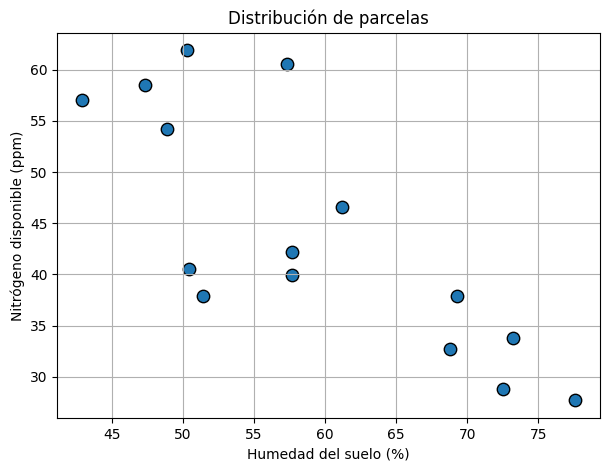

In [ ]:
# @title scatterplot
plt.figure(figsize=(7, 5))
plt.scatter(df['humedad_suelo'], df['nitrógeno_disponible'], s=80, edgecolor='k')
plt.xlabel("Humedad del suelo (%)")
plt.ylabel("Nitrógeno disponible (ppm)")
plt.title("Distribución de parcelas")
plt.grid(True)
plt.show()

## K-means y determinación del número óptimo de clusters (*k*)
Para evaluar que tan bueno es un agrupamiento calculamos el coeficiente de silueta para distintos valores de *k*. Este coeficiente mide qué tan bien está asignado cada punto a su cluster. Se evalúa, para cada observación, si está **más cerca de los puntos de su propio cluster** que de los puntos de otros clusters. Luego el coeficiente de sileta es el promedio de todos estos valores.

### Guía práctica para analizar el *Silhouette Score*
Este valor el valor varía entre **–1** y **+1**.

- **> 0.5** → Agrupamiento fuerte y bien definido  
- **0.25 – 0.5** → Agrupamiento aceptable con posibles solapamientos  
- **< 0.25** → Agrupamiento débil; puede que no haya estructura real o el número de clusters no sea adecuado



k = 2 -> Score: 0.543
k = 3 -> Score: 0.598
k = 4 -> Score: 0.556
k = 5 -> Score: 0.485
k = 6 -> Score: 0.407


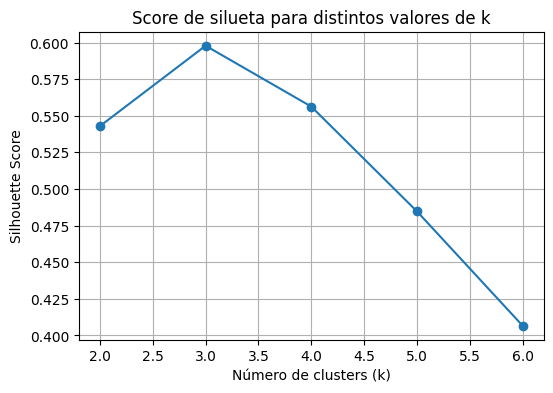

In [ ]:
#@title K-means para k de 2 a 6 y su correspondiente score de silueta

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

X_std = StandardScaler().fit_transform(X)
range_k = range(2, 7)
silhouette_scores = []

for k in range_k:
    model = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels_k = model.fit_predict(X_std)
    score_k = silhouette_score(X_std, labels_k)
    silhouette_scores.append(score_k)
    print(f"k = {k} -> Score: {score_k:.3f}")

plt.figure(figsize=(6, 4))
plt.plot(range_k, silhouette_scores, marker='o')
plt.title("Score de silueta para distintos valores de k")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

El análisis anterior indica que la cantidad óptima de clusters es *k*=3

### Aplicamos K-means a las parcelas

In [ ]:
X = df[['humedad_suelo', 'nitrógeno_disponible']]
X_std = StandardScaler().fit_transform(X)

k = 3
km = KMeans(n_clusters=k, n_init=10, random_state=42)
labels = km.fit_predict(X_std)
df['cluster_kmeans'] = labels
#df['cluster_kmeans'] = df['cluster_kmeans'].replace({0: "cluster 0", 1: "cluster 1", 2 : "cluster 2"})


Clusters asignados (automáticamente se asignan valores de cluster enteros, empezando en 0)

In [ ]:
df

,humedad_suelo,nitrógeno_disponible,cluster_kmeans
0,51.4,37.9,0
1,48.9,54.2,2
2,72.5,28.8,1
3,42.9,57.0,2
4,57.7,42.2,0
5,50.4,40.5,0
6,73.2,33.8,1
7,69.3,37.9,1
8,47.3,58.5,2
9,68.8,32.7,1


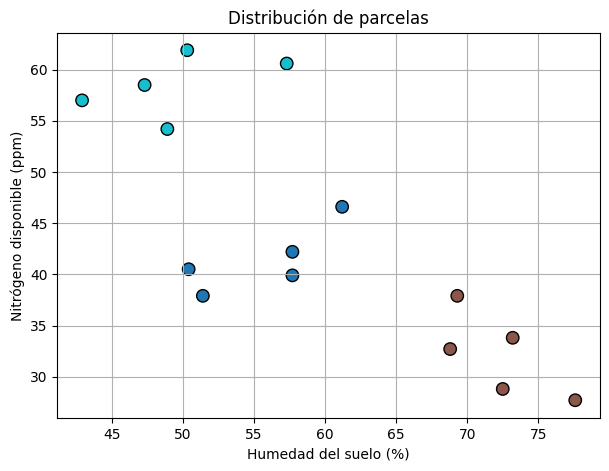

In [ ]:
# @title scatterplot
plt.figure(figsize=(7, 5))
plt.scatter(df['humedad_suelo'], df['nitrógeno_disponible'], s=80, edgecolor='k', c=df['cluster_kmeans'], cmap='tab10')
plt.xlabel("Humedad del suelo (%)")
plt.ylabel("Nitrógeno disponible (ppm)")
plt.title("Distribución de parcelas")
plt.grid(True)
plt.show()

### ¿Cómo analizamos cada cluster?
Para interpretar los clusters encontrados por K-means, podemos ver cómo se comportan las variables dentro de cada grupo, por ejemplo usando **boxplots** (o algún otro tipo de métrica descriptiva o visualización). Esto nos permite responder:
- ¿Cuál cluster tiene mayor humedad promedio?
- ¿Cuál muestra mayor contenido de nitrógeno?
- ¿Qué tan homogéneo es cada grupo?


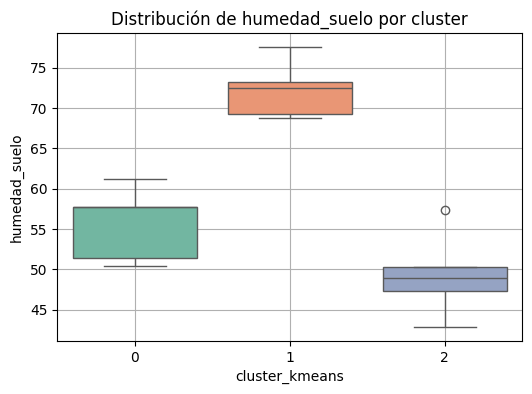

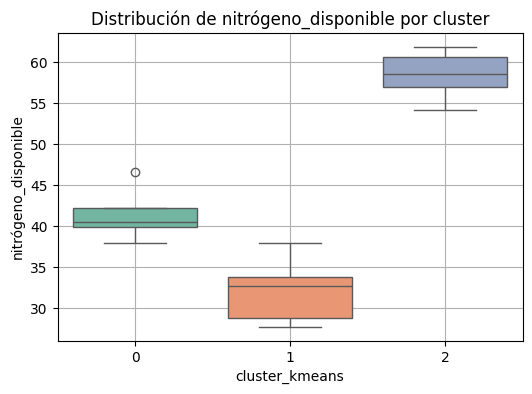

In [ ]:
# @title Boxplots
import seaborn as sns
for col in ['humedad_suelo', 'nitrógeno_disponible']:
    plt.figure(figsize=(6, 4))
    #sns.boxplot(data=df_cluster, x='cluster', y=col, palette='Set2')
    sns.boxplot(data=df, x='cluster_kmeans', y=col, hue='cluster_kmeans', palette='Set2', legend=False)
    plt.title(f'Distribución de {col} por cluster')
    plt.grid(True)
    plt.show()

### Interpretación de los clusters encontrados por K-means

A partir de los boxplots de las variables `humedad_suelo` y `nitrógeno_disponible`, se pueden caracterizar los tres grupos identificados por el algoritmo de K-means de la siguiente manera:

---

- Cluster 0
 - **Humedad del suelo**: nivel **medio-bajo**, entre ~50% y 60%
 - **Nitrógeno disponible**: nivel **medio**, valores moderados y consistentes
 - **Interpretación**: parcelas con condiciones promedio, sin limitaciones severas pero tampoco con ventajas marcadas. Pueden servir como referencia o control en un ensayo.

---

- Cluster 1
 - **Humedad del suelo**: **alta**, entre ~69% y 78%
 - **Nitrógeno disponible**: **bajo**, entre ~28 y 35 ppm
 - **Interpretación**: suelos con buena disponibilidad hídrica pero pobres en nitrógeno. Requieren intervención específica en fertilización para mejorar el rendimiento.

---

- Cluster 2
 - **Humedad del suelo**: **baja**, alrededor de 48–50%
 - **Nitrógeno disponible**: **alta**, entre ~55 y 62 ppm
 - **Interpretación**: suelos fértiles pero con limitación hídrica. Es probable que se beneficien de mejoras en riego o prácticas de conservación de humedad.



In [ ]:
# @title Generando etiquetas más representativas
etiquetas = {
    0: "Parcelas promedio",
    1: "Húmedas y pobres en N",
    2: "Secas y fértiles"
}

df['descripcion_cluster_kmeans'] = df['cluster_kmeans'].map(etiquetas)
df

,humedad_suelo,nitrógeno_disponible,cluster_kmeans,descripcion_cluster_kmeans
0,51.4,37.9,0,Parcelas promedio
1,48.9,54.2,2,Secas y fértiles
2,72.5,28.8,1,Húmedas y pobres en N
3,42.9,57.0,2,Secas y fértiles
4,57.7,42.2,0,Parcelas promedio
5,50.4,40.5,0,Parcelas promedio
6,73.2,33.8,1,Húmedas y pobres en N
7,69.3,37.9,1,Húmedas y pobres en N
8,47.3,58.5,2,Secas y fértiles
9,68.8,32.7,1,Húmedas y pobres en N


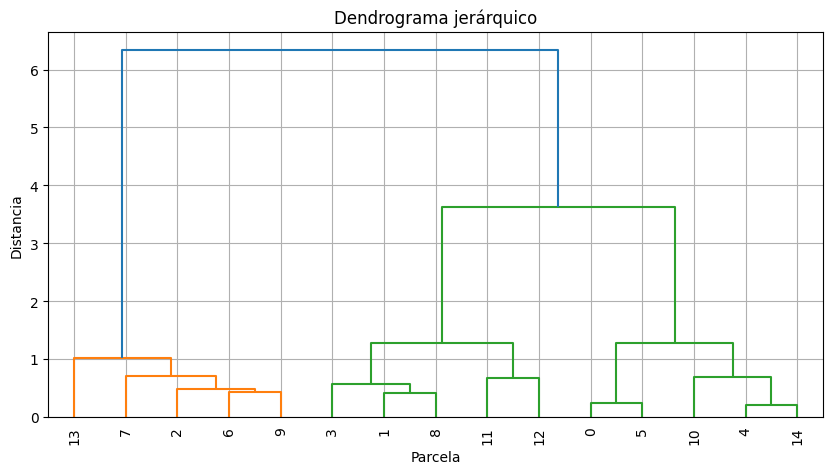

,humedad_suelo,nitrógeno_disponible,cluster_kmeans,descripcion_cluster_kmeans,cluster_jerarquico
0,51.4,37.9,0,Parcelas promedio,2
1,48.9,54.2,2,Secas y fértiles,1
2,72.5,28.8,1,Húmedas y pobres en N,0
3,42.9,57.0,2,Secas y fértiles,1
4,57.7,42.2,0,Parcelas promedio,2
5,50.4,40.5,0,Parcelas promedio,2
6,73.2,33.8,1,Húmedas y pobres en N,0
7,69.3,37.9,1,Húmedas y pobres en N,0
8,47.3,58.5,2,Secas y fértiles,1
9,68.8,32.7,1,Húmedas y pobres en N,0


In [ ]:
# @title Resolución mediante método jerárquico

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

# Selección de variables y estandarización
X = df[['humedad_suelo', 'nitrógeno_disponible']]
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Clustering jerárquico con método ward
Z = linkage(X_std, method='ward')

# Mostrar dendrograma
plt.figure(figsize=(10, 5))
dendrogram(Z, leaf_rotation=90., leaf_font_size=10., color_threshold=5)
plt.title("Dendrograma jerárquico")
plt.xlabel("Parcela")
plt.ylabel("Distancia")
plt.grid(True)
plt.show()

# Cortar el dendrograma en 3 clusters (t=3)
labels_hier = fcluster(Z, t=3, criterion='maxclust')

# Guardar las etiquetas en el dataframe
df['cluster_jerarquico'] = labels_hier - 1  # para empezar en 0
df


Notar que los clusters quedan nombrados con etiquetas diferentes, pero son los mismos que los obtenidos por el método de k-means.